<a href="https://colab.research.google.com/github/Veshek/HairlineClassification/blob/master/Hairline_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from PIL import Image
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional layer: 32 filters, kernel size of 3x3, activation function ReLU
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Another convolutional layer: 64 filters
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flattening the 2D arrays for fully connected layers
        Flatten(),

        # Dropout for regularization
        Dropout(0.5),

        # Dense (fully connected) layer: 128 neurons
        Dense(128, activation='relu'),

        # Output layer: 'num_classes' neurons for classification
        Dense(num_classes, activation='softmax')
    ])

    return model

In [ ]:

def compile_model(model):
    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 64, 64  # Change this to the dimensions you want
batch_size = 32

# Create an instance of ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Data augmentation: Random rotations
    width_shift_range=0.2,  # Data augmentation: Random horizontal shifting
    height_shift_range=0.2,  # Data augmentation: Random vertical shifting
    shear_range=0.2,  # Data augmentation: Random shearing
    zoom_range=0.2,  # Data augmentation: Random zooming
    # horizontal_flip=True,  # Data augmentation: Random horizontal flips
    # fill_mode='nearest',  # Fill strategy for new pixels
    validation_split=0.2  # Splitting data: 20% for validation
)

# Flow training images in batches from the directory
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScienceProjects/HairlineClassificationProject/Data/Train',  # This is the source directory for training images
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Or 'categorical' if more than two classes
    subset='training'  # Set as training data
)

# Similarly setup validation generator if needed
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScienceProjects/HairlineClassificationProject/Data/Val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Or 'categorical' if more than two classes
    subset='validation'  # Set as validation data
)


Found 258 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


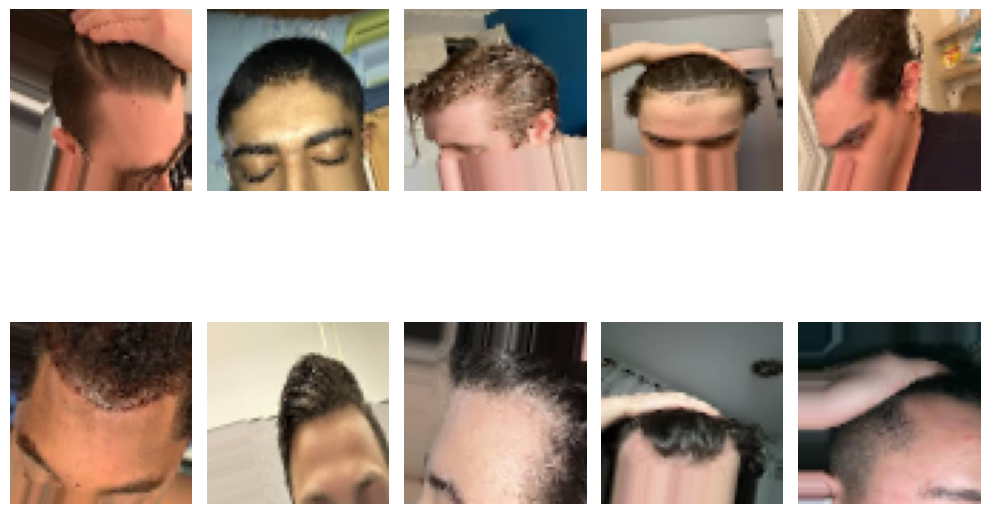

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img

def save_and_display_augmented_images(generator, file_path, num_images=10):
    # Get a batch of images
    batch = next(generator)
    images = batch[0]  # batch[0] contains the image data

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(num_images // 5 + 1, 5, i + 1)
        img = array_to_img(images[i])
        plt.imshow(img)
        plt.axis('off')

    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(file_path)
    plt.show()

# Example usage
save_and_display_augmented_images(train_generator, '/content/drive/MyDrive/augmented_images.png')

In [ ]:
print(f"train generator number of samples: {train_generator.samples}")
print(f"batch size: {batch_size}")

258//32

train generator number of samples: 258
batch size: 32


8

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=8
)


Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 0.6035 - accuracy: 0.6562

2/2 [==============================] - 2s 1s/step - loss: 0.6035 - accuracy: 0.6562 - val_loss: 0.8267 - val_accuracy: 0.4375
Epoch 2/100
2/2 [==============================] - 1s 412ms/step - loss: 0.6814 - accuracy: 0.5938
Epoch 3/100
2/2 [==============================] - 1s 518ms/step - loss: 0.6390 - accuracy: 0.6765
Epoch 4/100
2/2 [==============================] - 1s 320ms/step - loss: 0.6963 - accuracy: 0.5312
Epoch 5/100
2/2 [==============================] - 1s 309ms/step - loss: 0.6317 - accuracy: 0.6562
Epoch 6/100
2/2 [==============================] - 1s 248ms/step - loss: 0.6816 - accuracy: 0.5781
Epoch 7/100
2/2 [==============================] - 1s 311ms/step - loss: 0.6316 - accuracy: 0.6094
Epoch 8/100
2/2 [==============================] - 1s 308ms/step - loss: 0.5980 - accuracy: 0.6250
Epoch 9/100
2/2 [==============================] - 1s 321ms/step - loss: 0.6693 - accuracy: 0.5938
Epoch 10/100
2/2 [==============================] - 0s 61ms/step - loss: 0.6009 - 

In [ ]:
model.history.history

{'loss': [0.6035118699073792,
  0.6813908219337463,
  0.6389625072479248,
  0.6962552070617676,
  0.6316825151443481,
  0.6815937757492065,
  0.6315561532974243,
  0.5980093479156494,
  0.6692923903465271,
  0.6009308099746704,
  0.7227566242218018,
  0.627055287361145,
  0.6681764721870422,
  0.6031745672225952,
  0.6587517857551575,
  0.5892009735107422,
  0.5959056615829468,
  0.7150701284408569,
  0.6667795181274414,
  0.6730747222900391,
  0.6156951189041138,
  0.68553227186203,
  0.6261283159255981,
  0.6257092356681824,
  0.6102721691131592,
  0.6293983459472656,
  0.6507619619369507,
  0.6284352540969849,
  0.6018405556678772,
  0.6425390839576721,
  0.6282268762588501,
  0.5827864408493042,
  0.6795518398284912,
  0.6718100309371948,
  0.7277315855026245,
  0.7165414690971375,
  0.5637409687042236,
  0.7430720925331116,
  0.6540656685829163,
  0.8518316745758057,
  0.6693019866943359,
  0.7056686878204346,
  0.6644754409790039,
  0.7360633611679077,
  0.6920821666717529,
  0.6